In [0]:
import torch
import torch.nn as nn
# 신경망 모델들이 포함되어있다.
import torch.optim as optim
#경사하강법 알고리즘이 포함되어있다.
import torch.nn.init as init
#텐서에 초기값을 주기위해 필요한 함수들이있다.
import matplotlib.pyplot as plt

# 기초 문법

In [8]:
X = torch.Tensor(2,3)
# 2x3 짜리 배열 만든다. 난수로 만든다.
x = torch.tensor([[1,2,3],[4,5,6]])
# 2x3을 값을 초기화하여 배열을 만든다.


[2.0, 3.0]

In [11]:
x = torch.tensor(data=[2.0,3.0],requires_grad=True)
# 인수로 data, dtype, device , rrequires_grad 등을 받는다. data 는 앞선 예처럼 배열이 들어간다.

2

In [4]:
x = torch.tensor(data=[2.0,3.0],requires_grad=True)
y = x ** 2
z = 2*y+3

target = torch.tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target))

loss.backward()
# backward 는 기울기 계산해줌 
print(x.grad,y.grad,z.grad)
# y , z 는 leaf 노드가 아니기 때문에 None이 리턴된다. 
# z = 2*x**2 + 3 식에서 단순하게 x 의 기울기를 구하는 코드다 .

tensor([ 8., 12.]) None None


In [0]:
num_data = 1000
# 사용할 데이터의 수
num_epoch = 500
# 경사하강법 반복 횟수
x = init.uniform_(torch.Tensor(num_data,1), -10 , 10)
#-10 부터 10 까지의 균등하게 초기화. x 에는 -10 부터 10 까지의 숫자들이 무작위로 들어가있다. 
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
# 현실성을 반영하기위한 표준 정규 분포를 따르는 가우시안 노이즈. std = 표준편차 mean = 0 
y = 2 *x + 3
# y 는 -17 에서 23 사이에 분포
y_noise = 2*(x+noise) + 3
model = nn.Linear(1,1)
# x는 1개의 특성을 가진 데이터 1000개, y는 1개의 결과를 가진 데이터 1000개
loss_func = nn.L1Loss()
#절대값의 평균
optimizer = optim.SGD(model.parameters(),lr=0.01)
#경사하강법을 위한 SGD, model.parameters()을 이용하여 w,b를 전달함
label = y_noise
# 학습이 시작되는 부분
# 에폭 = 데이터 전체를 학습에 한 번 사용하는 주기.
for i in range(num_epoch):
  optimizer.zero_grad()
  # 기울기를 0 으로 초기화 기울기를 초기화해야 새로운 가중치와 편차에 대해서 새로운 기울기를 구할수있다. 
  output = model(x)
  #x 에대한 결과를 output에 저장

  loss = loss_func(output,label)
  # output , 과 noise 의 차이를 로스에 저장
  loss.backward()
  optimizer.step()

  if i % 10 ==0:
    print(loss.data)
    param_list = list(model.parameters())
    print(param_list[0].item(),param_list[1].item())

tensor(15.1262)
-0.9357737898826599 0.5446316003799438
tensor(12.6692)
-0.44037288427352905 0.556211531162262
tensor(10.2586)
0.04981633648276329 0.5702915787696838
tensor(7.9082)
0.5338237881660461 0.5871114134788513
tensor(5.7067)
1.0004371404647827 0.6104913949966431
tensor(3.8797)
1.4201582670211792 0.6446713805198669
tensor(2.9241)
1.7100846767425537 0.698671281337738
tensor(2.5882)
1.8678209781646729 0.7680113315582275
tensor(2.4673)
1.9429818391799927 0.8423512578010559
tensor(2.3991)
1.977004885673523 0.9154911637306213
tensor(2.3455)
1.9925744533538818 0.9867111444473267
tensor(2.2973)
1.9966509342193604 1.0556912422180176
tensor(2.2515)
1.9964473247528076 1.1233313083648682
tensor(2.2069)
1.997385859489441 1.1899912357330322
tensor(2.1646)
1.9956282377243042 1.2548710107803345
tensor(2.1244)
1.9942140579223633 1.3181109428405762
tensor(2.0859)
1.9930734634399414 1.3800908327102661
tensor(2.0488)
1.9937824010849 1.4409105777740479
tensor(2.0137)
1.9962677955627441 1.4999306201

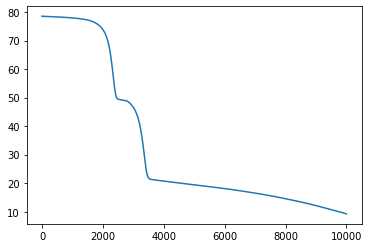

In [0]:
num_data = 1000
# 사용할 데이터의 수
num_epoch = 10000
# 경사하강법 반복 횟수
x = init.uniform_(torch.Tensor(num_data,1), -15 , 15)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = (x**2) + 3
y_noise = y + noise
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)
loss_func = nn.L1Loss()
#절대값의 평균
optimizer = optim.SGD(model.parameters(),lr=0.0002)
loss_array = []
# 학습이 시작되는 부분
# 에폭 = 데이터 전체를 학습에 한 번 사용하는 주기.
for i in range(num_epoch):
  optimizer.zero_grad()
  # 기울기를 0 으로 초기화 기울기를 초기화해야 새로운 가중치와 편차에 대해서 새로운 기울기를 구할수있다. 
  output = model(x)
  #x 에대한 결과를 output에 저장

  loss = loss_func(output,y_noise)
  # output , 과 noise 의 차이를 로스에 저장
  loss.backward()
  optimizer.step()
  loss_array.append(loss)

plt.plot(loss_array)
plt.show()
